# Effect of multiplexing (increasing $n$)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

---
---
---

# How much $A$ and $\overline F$ do we gain by increasing $n$?

In [45]:
10*np.log(1-0.1)/np.log(1-1e-5)

105359.98885484951

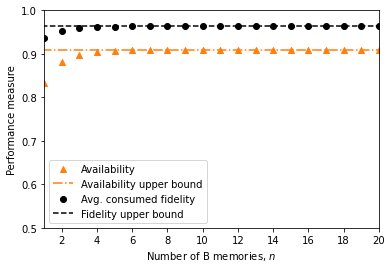

In [43]:
# Parameters
F_new = 1
p_gen = 0.5
p_con = 0.1
q = 1
Gamma = 0.05

# Target
n_vec = np.arange(1,20+1)

savefig = True



## CALCULATIONS ##

# Availability
A_vec = [1 / (1 + p_con/(1-(1-p_gen)**n)) for n in n_vec]
A_inf = 1 / (1 + p_con)

# Fidelity
F_vec = [0.25 + (F_new-0.25) / (1 + (np.exp(Gamma)-1)/(p_con+q*(1-p_con)*(1-(1-p_gen)**n))) for n in n_vec]
F_inf = 0.25 + (F_new-0.25)/(1 + (np.exp(Gamma)-1)/(p_con+q*(1-p_con)))



## PLOT ##
fig, ax = plt.subplots()
plt.scatter(n_vec, A_vec, marker='^', color='tab:orange', label='Availability')
plt.plot([0, n_vec[-1]], [A_inf, A_inf], '-.', color='tab:orange', label='Availability upper bound')
plt.scatter(n_vec, F_vec, marker='o', color='k', label='Avg. consumed fidelity')
plt.plot([0, n_vec[-1]], [F_inf, F_inf], '--', color='k', label='Fidelity upper bound')

# Plot specs
plt.xlabel(r'Number of B memories, $n$')
plt.ylabel(r'Performance measure')
plt.xlim(n_vec[0], n_vec[-1])
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.ylim([0.5, 1])
plt.legend()
if savefig:
    filename = 'figs/performance-vs-n_Fnew%.3f_pgen%.3f_pcon%.3f_q%.3f_Gamma%.5f.pdf'%(F_new, p_gen, p_con, q, Gamma)
    plt.savefig(filename, dpi=300, bbox_inches='tight')
else:
    plt.show()

---
---
---

# What $n$ makes $A$ and $\overline F$ closer than $\delta$ to its maximum value?

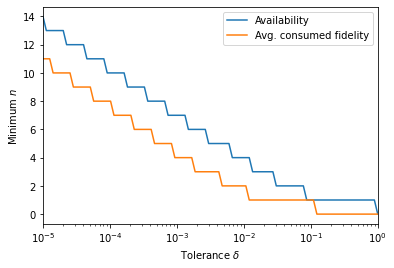

In [31]:
# Parameters
F_new = 1
p_gen = 0.5
p_con = 0.1
q = 1
Gamma = 0.02

# Target
delta_vec = np.logspace(-5,0,100)


## CALCULATIONS ##

# Availability
n_A = [np.ceil(np.log( 1 - ((1-delta)*p_con / (p_con+delta)) ) / np.log(1-p_gen)) for delta in delta_vec]
# Fidelity
F_inf = 0.25 + (F_new-0.25)/(1 + (np.exp(Gamma)-1)/(p_con+q*(1-p_con)))
Z_vec = [( (np.exp(Gamma)-1)*(F_inf*(1-delta)-0.25) - p_con * (F_new-F_inf*(1-delta)) ) / (q*(1-p_con) * ( F_new - F_inf*(1-delta) )) for delta in delta_vec]
n_F = [np.ceil(np.log(1-Z) / np.log(1-p_gen)) for Z in Z_vec]

plt.plot(delta_vec, n_A, label='Availability')
plt.plot(delta_vec, n_F, label='Avg. consumed fidelity')
plt.xlabel(r'Tolerance $\delta$')
plt.ylabel('Minimum $n$')
plt.xlim(delta_vec[0], delta_vec[-1])
plt.xscale('log')
plt.legend()
plt.show()

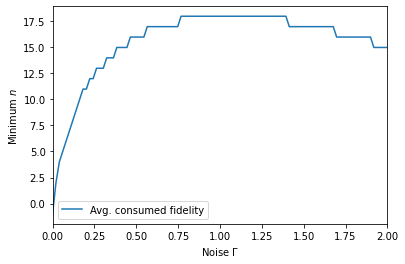

In [13]:
# Parameters
F_new = 1
p_gen = 0.1
p_con = 0.1
q = 1
Gamma_vec = np.linspace(0,2,100)

# Target
delta = 0.05


## CALCULATIONS ##

# Fidelity
Z_vec = [( (np.exp(Gamma)-1)*((0.25 + (F_new-0.25)/(1 + (np.exp(Gamma)-1)/(p_con+q*(1-p_con))))*(1-delta)-0.25) - p_con * (F_new-(0.25 + (F_new-0.25)/(1 + (np.exp(Gamma)-1)/(p_con+q*(1-p_con))))*(1-delta)) ) / (q*(1-p_con) * ( F_new - (0.25 + (F_new-0.25)/(1 + (np.exp(Gamma)-1)/(p_con+q*(1-p_con))))*(1-delta) )) for Gamma in Gamma_vec]
n_F = [np.ceil(np.log(1-Z) / np.log(1-p_gen)) for Z in Z_vec]

plt.plot(Gamma_vec, n_F, label='Avg. consumed fidelity')
plt.xlabel(r'Noise $\Gamma$')
plt.ylabel('Minimum $n$')
plt.xlim(Gamma_vec[0], Gamma_vec[-1])
plt.legend()
plt.show()

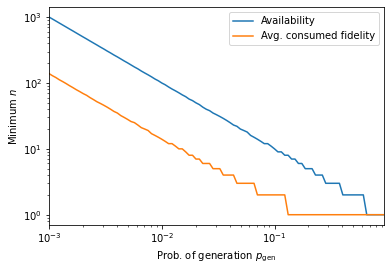

In [21]:
# Parameters
F_new = 1
p_gen_vec = np.logspace(-3,0,100)[:-1]
p_con = 0.1
q = 1
Gamma = 0.02

# Target
delta = 0.05


## CALCULATIONS ##

# Availability
n_A = [np.ceil(np.log( 1 - ((1-delta)*p_con / (p_con+delta)) ) / np.log(1-p_gen)) for p_gen in p_gen_vec]
# Fidelity
F_inf = 0.25 + (F_new-0.25)/(1 + (np.exp(Gamma)-1)/(p_con+q*(1-p_con)))
Z = ( (np.exp(Gamma)-1)*(F_inf*(1-delta)-0.25) - p_con * (F_new-F_inf*(1-delta)) ) / (q*(1-p_con) * ( F_new - F_inf*(1-delta) ))
n_F = [np.ceil(np.log(1-Z) / np.log(1-p_gen)) for p_gen in p_gen_vec]

plt.plot(p_gen_vec, n_A, label='Availability')
plt.plot(p_gen_vec, n_F, label='Avg. consumed fidelity')
plt.xlabel(r'Prob. of generation $p_\mathrm{gen}$')
plt.ylabel('Minimum $n$')
plt.xlim(p_gen_vec[0], p_gen_vec[-1])
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()

---
---
---

# What $n$ makes $A$ and $\overline F$ larger than some threshold?

/var/folders/4n/1yb9kg6j47z7d5b20bg474l0km7sd6/T/ipykernel_35801/1071437507.py:15: RuntimeWarning: invalid value encountered in log
  n_A = [np.ceil(np.log( 1 - (p_con*A) / (1-A) ) / np.log(1-p_gen)) for A in threshold_vec]
/var/folders/4n/1yb9kg6j47z7d5b20bg474l0km7sd6/T/ipykernel_35801/1071437507.py:15: RuntimeWarning: divide by zero encountered in double_scalars
  n_A = [np.ceil(np.log( 1 - (p_con*A) / (1-A) ) / np.log(1-p_gen)) for A in threshold_vec]
/var/folders/4n/1yb9kg6j47z7d5b20bg474l0km7sd6/T/ipykernel_35801/1071437507.py:19: RuntimeWarning: invalid value encountered in log
  n_F = [np.ceil(np.log( 1 - ((np.exp(Gamma)-1)*(F-0.25)-p_con*(F_new-F)) / (q*(1-p_con)*(F_new-F)) ) / np.log(1-p_gen)) for F in threshold_vec]
/var/folders/4n/1yb9kg6j47z7d5b20bg474l0km7sd6/T/ipykernel_35801/1071437507.py:19: RuntimeWarning: divide by zero encountered in double_scalars
  n_F = [np.ceil(np.log( 1 - ((np.exp(Gamma)-1)*(F-0.25)-p_con*(F_new-F)) / (q*(1-p_con)*(F_new-F)) ) / np.log(1-p_gen)

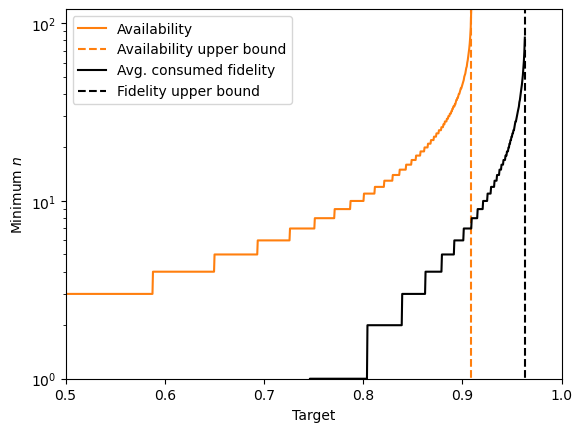

In [3]:
# Parameters
F_new = 1
p_gen = 0.05
p_con = 0.1
q = 1
Gamma = 0.05

# Target
threshold_vec = np.linspace(0.5,1,1000)


## CALCULATIONS ##

# Availability
n_A = [np.ceil(np.log( 1 - (p_con*A) / (1-A) ) / np.log(1-p_gen)) for A in threshold_vec]
A_inf = 1 / (1 + p_con)

# Fidelity
n_F = [np.ceil(np.log( 1 - ((np.exp(Gamma)-1)*(F-0.25)-p_con*(F_new-F)) / (q*(1-p_con)*(F_new-F)) ) / np.log(1-p_gen)) for F in threshold_vec]
F_inf = 0.25 + (F_new-0.25)/(1 + (np.exp(Gamma)-1)/(p_con+q*(1-p_con)))


## PLOT ##
max_n = max(max(n_A), max(n_F))
plt.plot(threshold_vec, n_A, '-', color='tab:orange', label='Availability')
plt.plot([A_inf, A_inf], [0, max_n], '--', color='tab:orange', label='Availability upper bound')
plt.plot(threshold_vec, n_F, '-', color='k', label='Avg. consumed fidelity')
plt.plot([F_inf, F_inf], [0, max_n], '--', color='k', label='Fidelity upper bound')

# Plot specs
plt.xlabel(r'Target')
plt.ylabel(r'Minimum $n$')
plt.xlim(threshold_vec[0], threshold_vec[-1])
if max_n > 100:
    plt.ylim([1, max_n])
    plt.yscale('log')
else:
    plt.ylim([0, max_n])
plt.legend()
plt.show()